# Języki Programowania Python i R


## dr inż. Patryk Jasik
### Division of Theoretical Physics and Quantum Information
### Institute of Physics and Computer Science
### Faculty of Applied Physics and Mathematics
### Gdansk University of Technology

# scikit-learn docs
## https://scikit-learn.org/stable/

In [4]:
#%config Completer.use_jedi = False

**Regression** - is an approach for modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables).

2D problem\
$$
y_i = a*x_i + b
$$


Multidimensional problem\
$$
y_i = a_1*x_{i1} + a_2*x_{i2} + ... + a_p*x_{ip} + intercept
$$

In [5]:
#loading the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [6]:
#measurements of physical and chemical properties of Portuguese Vinho Verde wines (white and red) 
wine = pd.read_csv("data/winequality-all.csv", comment="#")
wine.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,response,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,3,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,3,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,3,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,4,red
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,3,red


In [7]:
type(wine)

pandas.core.frame.DataFrame

In [8]:
#helpful information about the dataset that can be saved as variables
wine.shape

(5320, 13)

In [9]:
wine.columns

Index(['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'response', 'color'],
      dtype='object')

In [10]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         5320 non-null   float64
 1   volatile.acidity      5320 non-null   float64
 2   citric.acid           5320 non-null   float64
 3   residual.sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free.sulfur.dioxide   5320 non-null   float64
 6   total.sulfur.dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  response              5320 non-null   int64  
 12  color                 5320 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 540.4+ KB


In [11]:
#the color of the wine is of type object, so we need to change this variable to a categorical one
wine.color = wine.color.astype("category")
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed.acidity         5320 non-null   float64 
 1   volatile.acidity      5320 non-null   float64 
 2   citric.acid           5320 non-null   float64 
 3   residual.sugar        5320 non-null   float64 
 4   chlorides             5320 non-null   float64 
 5   free.sulfur.dioxide   5320 non-null   float64 
 6   total.sulfur.dioxide  5320 non-null   float64 
 7   density               5320 non-null   float64 
 8   pH                    5320 non-null   float64 
 9   sulphates             5320 non-null   float64 
 10  alcohol               5320 non-null   float64 
 11  response              5320 non-null   int64   
 12  color                 5320 non-null   category
dtypes: category(1), float64(11), int64(1)
memory usage: 504.2 KB


In [12]:
wine

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,response,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,3,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,3,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,3,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,4,red
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,3,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,4,white
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,3,white
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,4,white
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,5,white


In [13]:
#basic statistics
wine.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,response
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,3.795677
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,1.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,3.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,4.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,4.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,7.000000


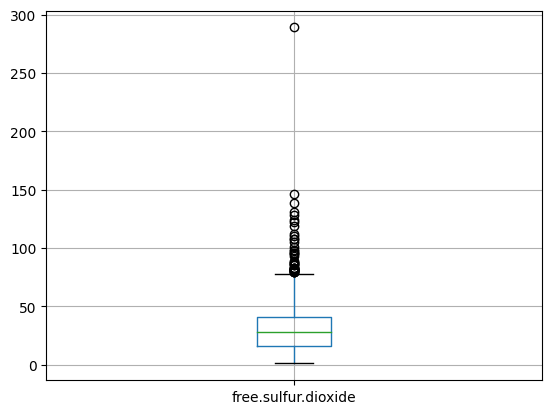

In [14]:
pd.DataFrame(wine['free.sulfur.dioxide']).boxplot()
plt.show()

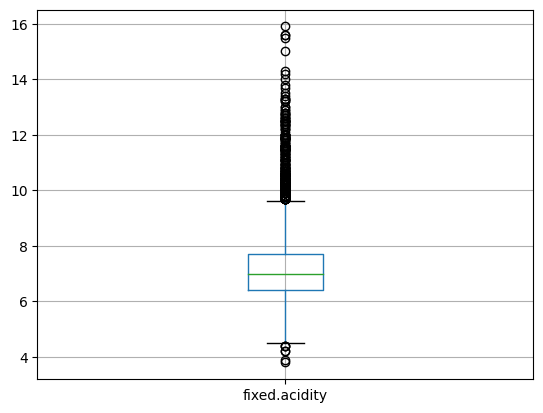

In [15]:
pd.DataFrame(wine['fixed.acidity']).boxplot()
plt.show()

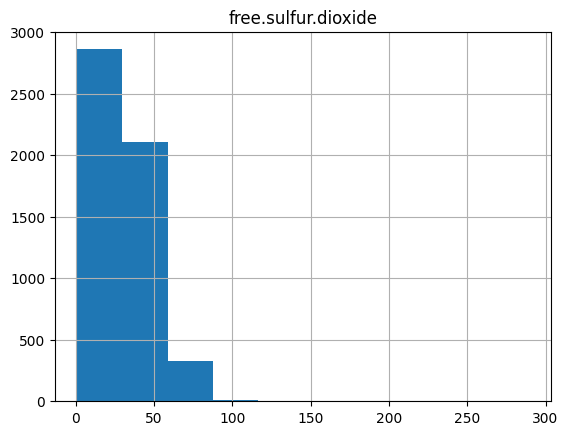

In [16]:
pd.DataFrame(wine['free.sulfur.dioxide']).hist()
plt.show()

In [17]:
wine.describe(include='all')

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,response,color
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3961
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,3.795677,NaN
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772,NaN
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,1.000000,NaN
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,3.000000,NaN
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,4.000000,NaN
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,4.000000,NaN


### goal - we will check whether alcohol is a function of the remaining 10 variables and what is the relationship.
### Thanks to this, we will be able to explain the derivative of what set of factors the given alcohol content is, as well as predict the alcohol content in the newly produced batch of wine.

In [18]:
#we check how many red wines and how many white wines are in our collection
wine.color.value_counts()

white    3961
red      1359
Name: color, dtype: int64

In [19]:
#We check how the statistics for red and white wines differ

#creation of the subsets
white_wine = wine[wine.color == 'white']
red_wine = wine[wine.color == 'red']

In [20]:
white_wine.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,response
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,3.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,1.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,3.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,4.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,4.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,7.000000


In [21]:
red_wine.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,response
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,3.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,1.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,3.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,4.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,4.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,6.000000


In [22]:
white_wine.columns

Index(['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'response', 'color'],
      dtype='object')

In [23]:
#the target variable
y = white_wine.iloc[:, -3] # alcohol is -3 column, zmienna celu
y.head(10)

1359     8.8
1360     9.5
1361    10.1
1362     9.9
1363     9.6
1364    11.0
1365    12.0
1366     9.7
1367    10.8
1368    12.4
Name: alcohol, dtype: float64

In [24]:
y.tail(10)

5310     9.2
5311     9.4
5312    11.8
5313    10.6
5314     9.7
5315    11.2
5316     9.6
5317     9.4
5318    12.8
5319    11.8
Name: alcohol, dtype: float64

In [25]:
#predictors
X = white_wine.iloc[:, :-3] # od poczatku do -3 (bez alkocholu), predyktor
X.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates
1359,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45
1360,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49
1361,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44
1362,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40
1363,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47


In [26]:
X.shape

(3961, 10)

# Correlation Study

An important element in statistical analysis is the study of the correlation of variables. It is thanks to it that we know if there is any relationship between the data sets.

It is very important to investigate the correlation when building a regression model. By examining the correlation of our goal (in this example 'alcohol') with the features, we can find out which of the featues is the most important and which will not help us create the appropriate model.

The most frequently studied correlations are:
 - <a href = https://en.wikipedia.org/wiki/Pearson_correlation_coefficient> **Pearson** </a> - examines the linear relationship in the X and Y data
 
$$
r_{p}= \frac{cov(X,Y)}{\sigma_X \sigma_Y}
$$

 - <a href = https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient> **Spearman** </a> - examines the rank dependence of X and Y data. A high value of the correlation coefficient does not mean that the data is linearly correlated, but as the value of X increases, the values of Y increase, but not necessarily always by the same value
 
 $$
 r_s = \frac{cov(R(X)R(Y))}{\sigma_{R(X)}\sigma_{R(Y)}}
 $$
 
*where*:
 
 $cov()$ - covariance, 
 
 $\sigma$ - standard deviation
 
 $R()$ - data rank

In [27]:
#let's calculate the Pearson's linear correlation coefficients
corr_P = white_wine.corr("pearson")
corr_P.shape

/tmp/ipykernel_109/3309651364.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_P = white_wine.corr("pearson")


(12, 12)

In [28]:
# help(white_wine.corr()) # strasznie duzo tekstu wypisuje

In [29]:
corr_P

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,response
fixed.acidity,1.000000,-0.019214,0.298959,0.083620,0.024036,-0.058396,0.082425,0.266091,-0.431274,-0.017453,-0.110788,-0.124636
volatile.acidity,-0.019214,1.000000,-0.163228,0.098340,0.086287,-0.102471,0.102315,0.060603,-0.046954,-0.021150,0.046815,-0.190678
citric.acid,0.298959,-0.163228,1.000000,0.106269,0.132590,0.091681,0.122845,0.160076,-0.183015,0.049442,-0.076514,0.007065
residual.sugar,0.083620,0.098340,0.106269,1.000000,0.076091,0.306835,0.409583,0.820498,-0.165997,-0.020503,-0.398167,-0.117339
chlorides,0.024036,0.086287,0.132590,0.076091,1.000000,0.101272,0.191145,0.253088,-0.090573,0.017871,-0.356928,-0.217739
free.sulfur.dioxide,-0.058396,-0.102471,0.091681,0.306835,0.101272,1.000000,0.619437,0.294638,-0.007750,0.037932,-0.251768,0.010507
total.sulfur.dioxide,0.082425,0.102315,0.122845,0.409583,0.191145,0.619437,1.000000,0.536868,0.008239,0.136544,-0.446643,-0.183356
density,0.266091,0.060603,0.160076,0.820498,0.253088,0.294638,0.536868,1.000000,-0.063734,0.082048,-0.760162,-0.337805
pH,-0.431274,-0.046954,-0.183015,-0.165997,-0.090573,-0.007750,0.008239,-0.063734,1.000000,0.142353,0.093095,0.123829
sulphates,-0.017453,-0.021150,0.049442,-0.020503,0.017871,0.037932,0.136544,0.082048,0.142353,1.000000,-0.022850,0.053200


In [30]:
np.triu(np.ones(12), k=1) # k - wplywa na diagonal macierzy trojkatnej (triu)

array([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [31]:
#we create a triangular matrix and display a correlation coefficients greater than 0.4 zeby wyciac duplikaty
corr_P_tri = corr_P.where(np.triu(np.ones(corr_P.shape, dtype=bool), k=1)).stack().sort_values() # stack przeksztalca w stack, sort sotruje
corr_P_tri

density               alcohol                -0.760162
total.sulfur.dioxide  alcohol                -0.446643
fixed.acidity         pH                     -0.431274
residual.sugar        alcohol                -0.398167
chlorides             alcohol                -0.356928
                                                ...   
residual.sugar        total.sulfur.dioxide    0.409583
alcohol               response                0.462869
total.sulfur.dioxide  density                 0.536868
free.sulfur.dioxide   total.sulfur.dioxide    0.619437
residual.sugar        density                 0.820498
Length: 66, dtype: float64

In [32]:
corr_P_tri[abs(corr_P_tri)>0.4] # tylko te ze wsplczynnikiem korelacji >0.4

density               alcohol                -0.760162
total.sulfur.dioxide  alcohol                -0.446643
fixed.acidity         pH                     -0.431274
residual.sugar        total.sulfur.dioxide    0.409583
alcohol               response                0.462869
total.sulfur.dioxide  density                 0.536868
free.sulfur.dioxide   total.sulfur.dioxide    0.619437
residual.sugar        density                 0.820498
dtype: float64

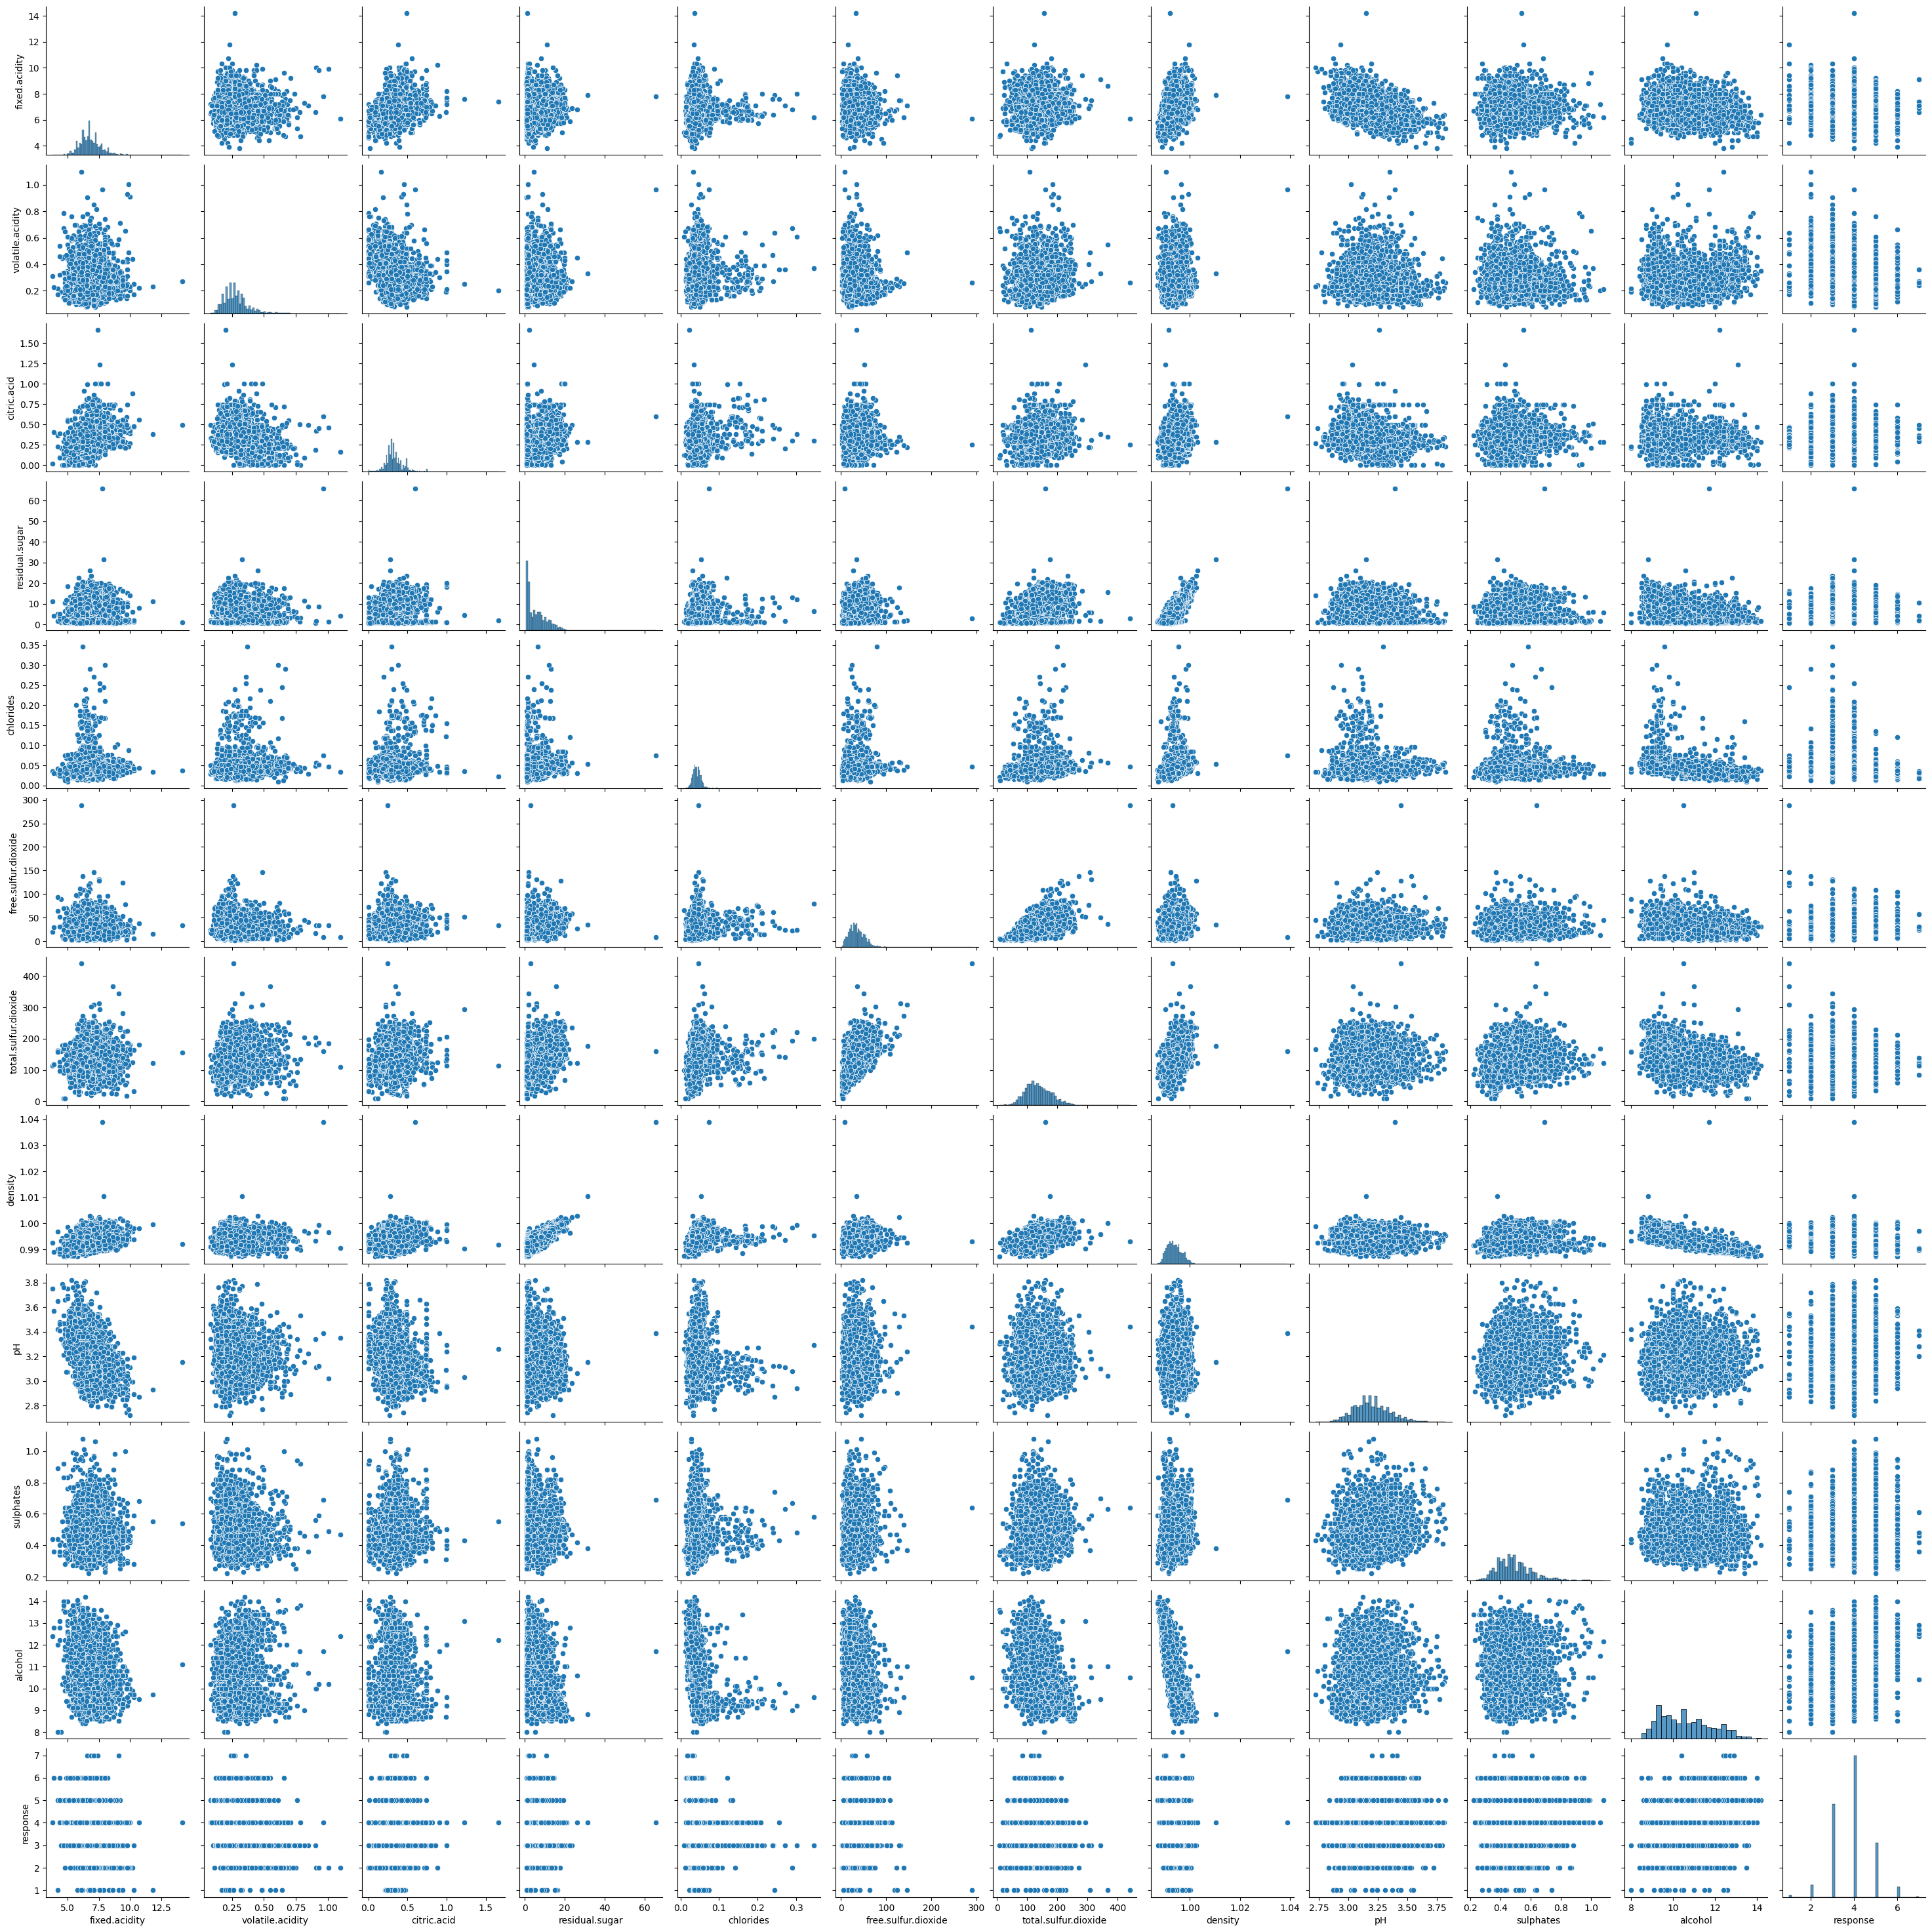

In [33]:
# visualization of correlation using seaborn pairplot figure
sns.pairplot(white_wine)
plt.show()

In [34]:
#let's calculate the Spearman's correlation coefficients
corr_S = white_wine.corr("spearman")
corr_S.shape

/tmp/ipykernel_109/2419133988.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_S = white_wine.corr("spearman")


(12, 12)

In [35]:
corr_S

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,response
fixed.acidity,1.000000,-0.037328,0.308689,0.092093,0.090136,-0.035506,0.096047,0.263979,-0.420407,-0.007606,-0.087765,-0.094236
volatile.acidity,-0.037328,1.000000,-0.161104,0.145917,0.017037,-0.089430,0.132091,0.037931,-0.062852,-0.007954,0.013266,-0.185385
citric.acid,0.308689,-0.161104,1.000000,0.030789,0.047333,0.084318,0.089576,0.099580,-0.169143,0.062574,-0.034389,0.030293
residual.sugar,0.092093,0.145917,0.030789,1.000000,0.191767,0.345052,0.431846,0.743296,-0.153187,0.000744,-0.378605,-0.092462
chlorides,0.090136,0.017037,0.047333,0.191767,1.000000,0.165546,0.368464,0.500773,-0.033579,0.099878,-0.565509,-0.333089
free.sulfur.dioxide,-0.035506,-0.089430,0.084318,0.345052,0.165546,1.000000,0.619998,0.322096,-0.017051,0.031688,-0.270173,0.032555
total.sulfur.dioxide,0.096047,0.132091,0.089576,0.431846,0.368464,0.619998,1.000000,0.568226,-0.002188,0.156994,-0.473471,-0.202576
density,0.263979,0.037931,0.099580,0.743296,0.500773,0.322096,0.568226,1.000000,-0.080766,0.103765,-0.808451,-0.382900
pH,-0.420407,-0.062852,-0.169143,-0.153187,-0.033579,-0.017051,-0.002188,-0.080766,1.000000,0.130640,0.119420,0.136190
sulphates,-0.007606,-0.007954,0.062574,0.000744,0.099878,0.031688,0.156994,0.103765,0.130640,1.000000,-0.060261,0.035592


In [36]:
#we create a triangular matrix and display an absolute of correlation coefficients is greater than 0.4
corr_S_tri = corr_S.where(np.triu(np.ones(corr_S.shape, dtype=bool), k=1)).stack().sort_values()
corr_S_tri[abs(corr_S_tri)>0.4]

density               alcohol                -0.808451
chlorides             alcohol                -0.565509
total.sulfur.dioxide  alcohol                -0.473471
fixed.acidity         pH                     -0.420407
residual.sugar        total.sulfur.dioxide    0.431846
alcohol               response                0.475713
chlorides             density                 0.500773
total.sulfur.dioxide  density                 0.568226
free.sulfur.dioxide   total.sulfur.dioxide    0.619998
residual.sugar        density                 0.743296
dtype: float64

In [37]:
import ydata_profiling

In [38]:
#we create a linear regression model
import sklearn.linear_model
lm = sklearn.linear_model.LinearRegression()

In [39]:
lm

LinearRegression()

In [40]:
help(sklearn.linear_model.LinearRegression())

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |  
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 | 

In [53]:
dir(lm) # wylistuj metody lm

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'coef_',
 'copy_X',
 'feature_names_in_',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [54]:
dir(wine)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex_

In [55]:
X

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates
1359,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45
1360,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49
1361,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44
1362,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40
1363,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47
...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38


In [56]:
y

1359     8.8
1360     9.5
1361    10.1
1362     9.9
1363     9.6
        ... 
5315    11.2
5316     9.6
5317     9.4
5318    12.8
5319    11.8
Name: alcohol, Length: 3961, dtype: float64

In [69]:
#let's train linear model
lm = sklearn.linear_model.LinearRegression(positive=True) # dodalismy positive=True, teraz wiekszosc wspolczynnikow jest zerowa; model nie mogl zostac dpswny
# patrzac na korelacje, mozna wnioskowac, ze uzyskane w ten sposob wspolczynniki nie wskazuja na faktycznie istotne predyktory
lm.fit(X,y)
# Nie tedy droga! (zle wspolczynniki)

LinearRegression(positive=True)

In [70]:
#coefficients of the linear model
lm.coef_ # wartosci wspolczynnikow jeszcze nie swiadcza o istotniosci danego predyktora, poniewaz na wartosc y sklada sie tez wartosc samego predyktora

array([0.        , 0.60360369, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.76700173, 0.        ])

In [71]:
lm = sklearn.linear_model.LinearRegression()
lm.fit(X, y)

LinearRegression()

In [72]:
lm.coef_

array([ 5.08985834e-01,  8.91433570e-01,  4.16880125e-01,  2.42749178e-01,
       -3.94341133e-01, -3.33635324e-03,  2.79786508e-04, -6.87861040e+02,
        2.42818063e+00,  1.01964556e+00])

In [73]:
X.columns

Index(['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates'],
      dtype='object')

In [74]:
#intercept
lm.intercept_

680.7090390332951

In [75]:
y.mean()

10.58935790625263

In [76]:
X.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000


In [77]:
#the mean value of the target variable
y.mean()

10.58935790625263

In [78]:
x_new = X.mean().values.reshape(1,-1) # zeby jednym elementem w array byl wektor
x_new

array([[6.83934612e+00, 2.80537743e-01, 3.34332239e-01, 5.91481949e+00,
        4.59050745e-02, 3.48891694e+01, 1.37193512e+02, 9.93789530e-01,
        3.19545822e+00, 4.90350921e-01]])

In [79]:
#let's do prediction for the mean value of all predictors
lm.predict(x_new)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([10.58935791])

In [80]:
#for a standardized dataset, the regression coefficients gain a useful interpretation
#i.e. the greater the value of the coefficient's modulus,
#the more significant it has an impact on the value of the objective variable
X_std = (X-X.mean(axis=0))/X.std(axis=0) # axis=0 => columns
X_std.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates
count,3.961000e+03,3.961000e+03,3.961000e+03,3.961000e+03,3.961000e+03,3.961000e+03,3.961000e+03,3.961000e+03,3.961000e+03,3.961000e+03
mean,-7.462403e-16,1.605493e-16,-4.305232e-17,1.677247e-16,-5.309787e-16,1.040431e-16,2.296124e-16,1.251388e-14,1.305921e-15,-5.040710e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.506157e+00,-1.938741e+00,-2.730444e+00,-1.093214e+00,-1.597435e+00,-1.911048e+00,-2.972323e+00,-2.299642e+00,-3.137394e+00,-2.381468e+00
25%,-6.221838e-01,-6.819386e-01,-5.253923e-01,-8.875223e-01,-4.720257e-01,-6.908283e-01,-7.232596e-01,-7.469302e-01,-6.958845e-01,-7.077954e-01
50%,-4.538926e-02,-1.985530e-01,-1.170494e-01,-2.498782e-01,-1.690310e-01,-1.097715e-01,-9.723169e-02,-9.968011e-02,-1.020038e-01,-9.117923e-02
75%,5.314053e-01,4.781869e-01,4.546308e-01,6.140267e-01,1.772487e-01,5.874967e-01,6.679136e-01,6.611831e-01,6.238505e-01,5.254370e-01
max,8.491171e+00,7.922325e+00,1.082654e+01,1.231788e+01,1.298960e+01,1.476528e+01,7.020938e+00,1.555826e+01,4.121148e+00,5.194102e+00


In [81]:
lm_std = sklearn.linear_model.LinearRegression()
lm_std.fit(X_std, (y-y.mean())/y.std())

LinearRegression()

In [83]:
lm_std.coef_

array([ 0.36252396,  0.07576131,  0.04194095,  0.96966857, -0.00748544,
       -0.04717757,  0.00991469, -1.64160477,  0.30234753,  0.09510745])

In [86]:
pd.Series(np.abs(lm_std.coef_), index=X.columns.to_list()).round(4).sort_values(ascending=False)
# widac korelcje drugiego stopnia (residual.sugar)

density                 1.6416
residual.sugar          0.9697
fixed.acidity           0.3625
pH                      0.3023
sulphates               0.0951
volatile.acidity        0.0758
free.sulfur.dioxide     0.0472
citric.acid             0.0419
total.sulfur.dioxide    0.0099
chlorides               0.0075
dtype: float64

In [87]:
# assessment of the quality of the model
# compare the fitted values calculated by the model with the original values
y_pred = lm.predict(X)
y_pred[0:15]

array([ 8.76177537,  9.46286638, 10.70447049,  9.96719912,  9.68406894,
       10.17792583, 11.86187488, 10.38714494, 11.29369773, 11.9224763 ,
       10.05549844, 11.17468358,  9.8626427 , 12.90865498, 11.16338974])

In [89]:
y[0:15] # wyglada calkiem dobrze dla pierwszych 15 wartosci; to jest zguba... trzeba patrzec na roznego rodzaju metryki jakosci
# na przyklad jest to R^2 (R^2 moze przyjmowac od -inf do 1, ponizej 0 - do bani, blisko 0 - do bani, blisko 1 - jest dobrze)

1359     8.8
1360     9.5
1361    10.1
1362     9.9
1363     9.6
1364    11.0
1365    12.0
1366     9.7
1367    10.8
1368    12.4
1369     9.7
1370    11.4
1371     9.6
1372    12.8
1373    11.3
Name: alcohol, dtype: float64

In [90]:
#R2 - determination coefficient
lm.score(X,y)

0.8580656118411163

In [105]:
sklearn.metrics.r2_score(y,y_pred) # lepiej jest uzywac metod z pakietu metrics, jest ich wiecej/duzo
# nie wolno bazowac na jednej, trzeba analizowac wszystkie; mamy teraz punkty odniesienia, nie mozna jednak teraz powiedziec czy model jest dobry
# to co nam teraz wyszlo, to jest wartosc referencyjna (model bazowy (nie zupelnie, bo na wszystkich danych zbudowany))
# po kolejnych czyszczeniach danych i poprawianiu modelu, bedziemy sie odnosic do tych wartosci, zeby sprawdzacz czy kolejne modele wyszly lepsze
# model bazowy jest punktem odniesienia i najlepiej jest go zrobic wczesnie na etapie poczatku analizy danych (na poczatku)
# poniej, zmieniajac metody modelowania czy czyszczac dane, bedzie mozna porownywac wyniki do wynikow z modelu bazowego

0.8580656118411163

In [101]:
#MAE - Mean Absolute Error; trzeba patrzec w jakich jednostkach jest wyrazony blad
sklearn.metrics.mean_absolute_error(y,y_pred) # w sklearn zawsze jest podawana oryginalna wartosc, potem predykcja (trzeba uwazac, gdzie indziej moze byc inczj)

0.301402019670666

In [99]:
#MSE - Mean Squared Error
sklearn.metrics.mean_squared_error(y,y_pred)

0.2101907465165438

In [100]:
#RMSE - Root Mean Square Error; bardziej rygorystyczny
sklearn.metrics.mean_squared_error(y,y_pred, squared=False)

0.458465643769022

In [103]:
help(sklearn.metrics.mean_squared_error)

Help on function mean_squared_error in module sklearn.metrics._regression:

mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)
    Mean squared error regression loss.
    
    Read more in the :ref:`User Guide <mean_squared_error>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Estimated target values.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    
    multioutput : {'raw_values', 'uniform_average'} or array-like of shape             (n_outputs,), default='uniform_average'
        Defines aggregating of multiple output values.
        Array-like value defines weights used to average errors.
    
        'raw_values' :
            Returns a full set of errors in case of multioutput input.
    


In [102]:
#MAPE - Mean Absolute Percentage Error
sklearn.metrics.mean_absolute_percentage_error(y,y_pred)*100

2.881005227740174

In [106]:
# trzeba teraz podzilic zbior danych na zbiory: treningowy oraz testowy (mozna przyjac podzial 80/20)

# elementy klas (klasyfikacji white/red) zostaly podzielone wczesniej na dwa zbiory, takze tu nie trzeba sie przejmowac podzialem
# pomiedzy klasyfikacjami

# we care about the model's good predictive ability
#but we also make sure not to overfit the model,
#so we divide the dataset into a training dataset (80%) and a test dataset (20%)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,
                                                                        y,
                                                                        test_size=0.2,
                                                                        random_state=12345)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3168, 10)
(793, 10)
(3168,)
(793,)


In [107]:
# jak metryki wyjda zle, to moze nie nalezy zrzucac wad modelu na slabe wylosowanie podzialu pomiedzy trening/test

#we will create a function that fits the linear regression model to a given sample
#and computes errors of prediction
def fit_regression(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    r2 = sklearn.metrics.r2_score
    rmse = sklearn.metrics.mean_squared_error
    mae = sklearn.metrics.mean_absolute_error
    
    return {
        "r_score_tr": r2(y_train, y_train_pred),
        "r_score_te": r2(y_test, y_test_pred),
        "RMSE_tr": rmse(y_train, y_train_pred, squared=False),
        "RMSE_te": rmse(y_test, y_test_pred, squared=False),
        "MAE_tr": mae(y_train, y_train_pred),
        "MAE_te": mae(y_test, y_test_pred)
    }

In [108]:
#operation of the above function and results
params = ["Lin. Reg."]
res = [fit_regression(sklearn.linear_model.LinearRegression(),
                      X_train,
                      X_test,
                      y_train,
                      y_test)]

results = pd.DataFrame(res, index=params)

In [110]:
results # trzeba dazyc do tego, by te metyrki byly zblizone do siebie

,r_score_tr,r_score_te,RMSE_tr,RMSE_te,MAE_tr,MAE_te
Lin. Reg.,0.906772,0.621868,0.37257,0.738505,0.282308,0.30647


In [111]:
# "a to sobie wylosuje lepiej..."

#let's change the random state
X_train_rs123, X_test_rs123, y_train_rs123, y_test_rs123 = sklearn.model_selection.train_test_split(
                                                                        X,
                                                                        y,
                                                                        test_size=0.2,
                                                                        random_state=123)

In [112]:
params.append("Lin. Reg. rs123")
res.append(fit_regression(sklearn.linear_model.LinearRegression(),
                          X_train_rs123, X_test_rs123, y_train_rs123, y_test_rs123))
results = pd.DataFrame(res, index=params)

In [115]:
results # wylosowalem sobie i wyszlo inaczje...; Nie moge polegac na liczbach pseudo-losowych! Tak nie wolno robic!
# trzeba robic "walidacje krzyzowa"; trzeba podzialow robic wiele
# zeby uniknac sytuacji, kiedy "raz jest taki wynik metryk, a raz inny"

# Foldowanie - podzial na 3 czesci zbioru danych; 0, 1 i 2. W pierwszej iteracji trening to 0, 1 a test to 2; w kolejnej iteracji
# inna kombinacja i w kolejnej iteracji inna kombinacja
# uzyskane metryki trzeba usrednic, mozna nawet policzyc odchylenie standardowe; jezeli std dev jest duze, to znaczy ze w zbiorze sa punkty oddalone
# tych "foldow" moze byc wiecej (np. 5)

# czasami moze jednak nie starczyc zasobow/czasu na foldowanie

,r_score_tr,r_score_te,RMSE_tr,RMSE_te,MAE_tr,MAE_te
Lin. Reg.,0.906772,0.621868,0.372570,0.738505,0.282308,0.306470
Lin. Reg. rs123,0.846568,0.903384,0.476746,0.377983,0.307115,0.290608


In [116]:
#let's change the size of the test dataset
X_train_70, X_test_70, y_train_70, y_test_70 = sklearn.model_selection.train_test_split(
                                                                        X,
                                                                        y,
                                                                        test_size=0.3,
                                                                        random_state=12345)

In [117]:
params.append("Lin. Reg. test size 70")
res.append(fit_regression(sklearn.linear_model.LinearRegression(),
                          X_train_70, X_test_70, y_train_70, y_test_70))
results = pd.DataFrame(res, index=params)

In [118]:
results

,r_score_tr,r_score_te,RMSE_tr,RMSE_te,MAE_tr,MAE_te
Lin. Reg.,0.906772,0.621868,0.372570,0.738505,0.282308,0.306470
Lin. Reg. rs123,0.846568,0.903384,0.476746,0.377983,0.307115,0.290608
Lin. Reg. test size 70,0.905130,0.722845,0.375262,0.637879,0.283070,0.296848


In [120]:
# Metoda modelowania z wykorzystaniem foldowania (podzial na 5)
from sklearn.model_selection import KFold 
kf = KFold(n_splits=5)
kf.get_n_splits(X)

5

In [121]:
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [122]:
X.reset_index(drop=True)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47
...,...,...,...,...,...,...,...,...,...,...
3956,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50
3957,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46
3958,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46
3959,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38


In [123]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_kf, X_test_kf = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]
    display(X_train_kf)
    display(y_train_kf)
    display(X_test_kf)
    display(y_test_kf)

TRAIN: [ 793  794  795 ... 3958 3959 3960] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 2

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates
2152,6.5,0.180,0.33,8.0,0.051,16.0,131.0,0.99650,3.28,0.44
2153,6.7,0.150,0.29,5.0,0.058,28.0,105.0,0.99460,3.52,0.44
2154,8.2,0.345,1.00,18.2,0.047,55.0,205.0,0.99965,2.96,0.43
2155,8.5,0.160,0.35,1.6,0.039,24.0,147.0,0.99350,2.96,0.36
2156,6.8,0.705,0.25,3.2,0.048,10.0,57.0,0.99600,3.36,0.52
...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.210,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50
5316,6.6,0.320,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46
5317,6.5,0.240,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46
5318,5.5,0.290,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38


2152     8.7
2153    10.2
2154     9.6
2155    10.0
2156     9.5
        ... 
5315    11.2
5316     9.6
5317     9.4
5318    12.8
5319    11.8
Name: alcohol, Length: 3168, dtype: float64

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates
1359,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45
1360,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49
1361,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44
1362,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40
1363,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47
...,...,...,...,...,...,...,...,...,...,...
2147,7.7,0.240,0.29,15.30,0.044,39.0,194.0,0.99820,3.06,0.47
2148,6.2,0.340,0.28,7.50,0.034,40.0,197.0,0.99485,3.14,0.60
2149,6.3,0.270,0.46,11.75,0.037,61.0,212.0,0.99710,3.25,0.53
2150,5.4,0.415,0.19,1.60,0.039,27.0,88.0,0.99265,3.54,0.41


1359     8.8
1360     9.5
1361    10.1
1362     9.9
1363     9.6
        ... 
2147     9.6
2148     9.7
2149     9.5
2150    10.0
2151    12.2
Name: alcohol, Length: 793, dtype: float64

TRAIN: [   0    1    2 ... 3958 3959 3960] TEST: [ 793  794  795  796  797  798  799  800  801  802  803  804  805  806
  807  808  809  810  811  812  813  814  815  816  817  818  819  820
  821  822  823  824  825  826  827  828  829  830  831  832  833  834
  835  836  837  838  839  840  841  842  843  844  845  846  847  848
  849  850  851  852  853  854  855  856  857  858  859  860  861  862
  863  864  865  866  867  868  869  870  871  872  873  874  875  876
  877  878  879  880  881  882  883  884  885  886  887  888  889  890
  891  892  893  894  895  896  897  898  899  900  901  902  903  904
  905  906  907  908  909  910  911  912  913  914  915  916  917  918
  919  920  921  922  923  924  925  926  927  928  929  930  931  932
  933  934  935  936  937  938  939  940  941  942  943  944  945  946
  947  948  949  950  951  952  953  954  955  956  957  958  959  960
  961  962  963  964  965  966  967  968  969  970  971  972  973  974
  975  976  977  978  979  9

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates
1359,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45
1360,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49
1361,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44
1362,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40
1363,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47
...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38


1359     8.8
1360     9.5
1361    10.1
1362     9.9
1363     9.6
        ... 
5315    11.2
5316     9.6
5317     9.4
5318    12.8
5319    11.8
Name: alcohol, Length: 3169, dtype: float64

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates
2152,6.5,0.180,0.33,8.0,0.051,16.0,131.0,0.99650,3.28,0.44
2153,6.7,0.150,0.29,5.0,0.058,28.0,105.0,0.99460,3.52,0.44
2154,8.2,0.345,1.00,18.2,0.047,55.0,205.0,0.99965,2.96,0.43
2155,8.5,0.160,0.35,1.6,0.039,24.0,147.0,0.99350,2.96,0.36
2156,6.8,0.705,0.25,3.2,0.048,10.0,57.0,0.99600,3.36,0.52
...,...,...,...,...,...,...,...,...,...,...
2939,8.0,0.190,0.30,2.0,0.053,48.0,140.0,0.99400,3.18,0.49
2940,8.0,0.200,0.36,1.2,0.032,21.0,78.0,0.99210,3.08,0.37
2941,8.0,0.250,0.26,14.0,0.043,41.0,248.0,0.99860,3.03,0.57
2942,7.2,0.200,0.61,16.2,0.043,14.0,103.0,0.99870,3.06,0.36


2152     8.7
2153    10.2
2154     9.6
2155    10.0
2156     9.5
        ... 
2939     9.6
2940    10.4
2941     8.7
2942     9.2
2943     9.2
Name: alcohol, Length: 792, dtype: float64

TRAIN: [   0    1    2 ... 3958 3959 3960] TEST: [1585 1586 1587 1588 1589 1590 1591 1592 1593 1594 1595 1596 1597 1598
 1599 1600 1601 1602 1603 1604 1605 1606 1607 1608 1609 1610 1611 1612
 1613 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623 1624 1625 1626
 1627 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639 1640
 1641 1642 1643 1644 1645 1646 1647 1648 1649 1650 1651 1652 1653 1654
 1655 1656 1657 1658 1659 1660 1661 1662 1663 1664 1665 1666 1667 1668
 1669 1670 1671 1672 1673 1674 1675 1676 1677 1678 1679 1680 1681 1682
 1683 1684 1685 1686 1687 1688 1689 1690 1691 1692 1693 1694 1695 1696
 1697 1698 1699 1700 1701 1702 1703 1704 1705 1706 1707 1708 1709 1710
 1711 1712 1713 1714 1715 1716 1717 1718 1719 1720 1721 1722 1723 1724
 1725 1726 1727 1728 1729 1730 1731 1732 1733 1734 1735 1736 1737 1738
 1739 1740 1741 1742 1743 1744 1745 1746 1747 1748 1749 1750 1751 1752
 1753 1754 1755 1756 1757 1758 1759 1760 1761 1762 1763 1764 1765 1766
 1767 1768 1769 1770 1771 17

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates
1359,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45
1360,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49
1361,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44
1362,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40
1363,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47
...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38


1359     8.8
1360     9.5
1361    10.1
1362     9.9
1363     9.6
        ... 
5315    11.2
5316     9.6
5317     9.4
5318    12.8
5319    11.8
Name: alcohol, Length: 3169, dtype: float64

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates
2944,6.4,0.220,0.32,7.90,0.029,34.0,124.0,0.99480,3.40,0.39
2945,7.0,0.530,0.02,1.00,0.036,39.0,107.0,0.99300,3.20,0.32
2946,7.3,0.240,0.41,13.60,0.050,41.0,178.0,0.99880,3.37,0.43
2947,7.2,0.240,0.40,17.85,0.049,50.0,185.0,1.00000,3.34,0.42
2948,7.6,0.150,0.40,1.30,0.036,24.0,112.0,0.99320,3.14,0.76
...,...,...,...,...,...,...,...,...,...,...
3731,5.7,0.370,0.30,1.10,0.029,24.0,88.0,0.98883,3.18,0.39
3732,7.9,0.250,0.35,6.70,0.039,22.0,64.0,0.99362,2.93,0.49
3733,7.2,0.210,0.28,2.70,0.033,38.0,94.0,0.99075,2.99,0.43
3734,7.0,0.240,0.30,6.70,0.039,37.0,125.0,0.99436,3.20,0.39


2944    10.2
2945     9.0
2946     9.7
2947     9.6
2948    10.0
        ... 
3731    11.7
3732    10.7
3733    11.8
3734     9.9
3735    13.4
Name: alcohol, Length: 792, dtype: float64

TRAIN: [   0    1    2 ... 3958 3959 3960] TEST: [2377 2378 2379 2380 2381 2382 2383 2384 2385 2386 2387 2388 2389 2390
 2391 2392 2393 2394 2395 2396 2397 2398 2399 2400 2401 2402 2403 2404
 2405 2406 2407 2408 2409 2410 2411 2412 2413 2414 2415 2416 2417 2418
 2419 2420 2421 2422 2423 2424 2425 2426 2427 2428 2429 2430 2431 2432
 2433 2434 2435 2436 2437 2438 2439 2440 2441 2442 2443 2444 2445 2446
 2447 2448 2449 2450 2451 2452 2453 2454 2455 2456 2457 2458 2459 2460
 2461 2462 2463 2464 2465 2466 2467 2468 2469 2470 2471 2472 2473 2474
 2475 2476 2477 2478 2479 2480 2481 2482 2483 2484 2485 2486 2487 2488
 2489 2490 2491 2492 2493 2494 2495 2496 2497 2498 2499 2500 2501 2502
 2503 2504 2505 2506 2507 2508 2509 2510 2511 2512 2513 2514 2515 2516
 2517 2518 2519 2520 2521 2522 2523 2524 2525 2526 2527 2528 2529 2530
 2531 2532 2533 2534 2535 2536 2537 2538 2539 2540 2541 2542 2543 2544
 2545 2546 2547 2548 2549 2550 2551 2552 2553 2554 2555 2556 2557 2558
 2559 2560 2561 2562 2563 25

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates
1359,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45
1360,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49
1361,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44
1362,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40
1363,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47
...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38


1359     8.8
1360     9.5
1361    10.1
1362     9.9
1363     9.6
        ... 
5315    11.2
5316     9.6
5317     9.4
5318    12.8
5319    11.8
Name: alcohol, Length: 3169, dtype: float64

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates
3736,7.0,0.28,0.32,7.75,0.032,30.0,114.0,0.99158,3.12,0.64
3737,6.9,0.40,0.30,10.60,0.033,24.0,87.0,0.99265,3.15,0.45
3738,6.6,0.41,0.31,1.60,0.042,18.0,101.0,0.99195,3.13,0.41
3739,6.4,0.20,0.28,2.50,0.032,24.0,84.0,0.99168,3.31,0.55
3740,8.5,0.22,0.34,0.70,0.040,5.0,25.0,0.99180,3.04,0.37
...,...,...,...,...,...,...,...,...,...,...
4523,6.7,0.31,0.30,2.40,0.038,30.0,83.0,0.98867,3.09,0.36
4524,6.2,0.39,0.24,4.80,0.037,45.0,138.0,0.99174,3.23,0.43
4525,7.1,0.37,0.30,6.20,0.040,49.0,139.0,0.99021,3.17,0.27
4526,7.2,0.23,0.82,1.30,0.149,70.0,109.0,0.99304,2.93,0.42


3736    12.8
3737    12.8
3738    10.5
3739    11.5
3740    10.5
        ... 
4523    12.8
4524    11.2
4525    13.6
4526     9.2
4527    11.1
Name: alcohol, Length: 792, dtype: float64

TRAIN: [   0    1    2 ... 3166 3167 3168] TEST: [3169 3170 3171 3172 3173 3174 3175 3176 3177 3178 3179 3180 3181 3182
 3183 3184 3185 3186 3187 3188 3189 3190 3191 3192 3193 3194 3195 3196
 3197 3198 3199 3200 3201 3202 3203 3204 3205 3206 3207 3208 3209 3210
 3211 3212 3213 3214 3215 3216 3217 3218 3219 3220 3221 3222 3223 3224
 3225 3226 3227 3228 3229 3230 3231 3232 3233 3234 3235 3236 3237 3238
 3239 3240 3241 3242 3243 3244 3245 3246 3247 3248 3249 3250 3251 3252
 3253 3254 3255 3256 3257 3258 3259 3260 3261 3262 3263 3264 3265 3266
 3267 3268 3269 3270 3271 3272 3273 3274 3275 3276 3277 3278 3279 3280
 3281 3282 3283 3284 3285 3286 3287 3288 3289 3290 3291 3292 3293 3294
 3295 3296 3297 3298 3299 3300 3301 3302 3303 3304 3305 3306 3307 3308
 3309 3310 3311 3312 3313 3314 3315 3316 3317 3318 3319 3320 3321 3322
 3323 3324 3325 3326 3327 3328 3329 3330 3331 3332 3333 3334 3335 3336
 3337 3338 3339 3340 3341 3342 3343 3344 3345 3346 3347 3348 3349 3350
 3351 3352 3353 3354 3355 33

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates
1359,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45
1360,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49
1361,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44
1362,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40
1363,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47
...,...,...,...,...,...,...,...,...,...,...
4523,6.7,0.31,0.30,2.4,0.038,30.0,83.0,0.98867,3.09,0.36
4524,6.2,0.39,0.24,4.8,0.037,45.0,138.0,0.99174,3.23,0.43
4525,7.1,0.37,0.30,6.2,0.040,49.0,139.0,0.99021,3.17,0.27
4526,7.2,0.23,0.82,1.3,0.149,70.0,109.0,0.99304,2.93,0.42


1359     8.8
1360     9.5
1361    10.1
1362     9.9
1363     9.6
        ... 
4523    12.8
4524    11.2
4525    13.6
4526     9.2
4527    11.1
Name: alcohol, Length: 3169, dtype: float64

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates
4528,4.7,0.455,0.18,1.9,0.036,33.0,106.0,0.98746,3.21,0.83
4529,6.2,0.280,0.51,7.9,0.056,49.0,206.0,0.99560,3.18,0.52
4530,6.4,0.350,0.28,1.6,0.037,31.0,113.0,0.98779,3.12,0.40
4531,6.6,0.310,0.28,1.4,0.035,28.0,107.0,0.98836,3.00,0.40
4532,7.4,0.250,0.37,2.6,0.050,24.0,132.0,0.99138,3.04,0.53
...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.210,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50
5316,6.6,0.320,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46
5317,6.5,0.240,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46
5318,5.5,0.290,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38


4528    14.0
4529     9.4
4530    14.2
4531    13.2
4532    11.2
        ... 
5315    11.2
5316     9.6
5317     9.4
5318    12.8
5319    11.8
Name: alcohol, Length: 792, dtype: float64

In [ ]:
#let's create a set of regression models
#we start with one model and we will add other models later on
methods = pd.Series({
    "lin_reg": sklearn.linear_model.LinearRegression()
})

In [ ]:
#evaluation function
def eval_function(X_train, X_test, y_train, y_test):
    cv_models = pd.concat([
        pd.Series(fit_regression(alg,
                                 X_train, X_test, y_train, y_test)) for alg in methods], axis=1).T
    cv_models.index = methods.index
    return cv_models

In [ ]:
#application of the evaluation function
#results summarizing the cross validation
from sklearn.model_selection import KFold

n_folds = 5

results_cv = [eval_function(X.iloc[train,:],
                            X.iloc[test,:],
                            y.iloc[train],
                            y.iloc[test]) for train, test in kf.split(X)]

sum(results_cv)/n_folds

In [ ]:
results_cv

In [ ]:
(sum(results_cv)/n_folds).to_dict()

In [ ]:
#we append the cross validation results to our main dataframe with all results
params.append(" ")
res.append( )
results = pd.DataFrame(res, index=params)

In [ ]:
results

In [ ]:
#cross validation could be done in a simpler way
from sklearn.model_selection import cross_validate

#scoring parameters 
#https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

cv_results = cross_validate(sklearn.linear_model.LinearRegression(),
                            X,
                            y,
                            scoring=('r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error'),
                            cv=5,
                            return_train_score=True)

In [ ]:
cv_results

In [ ]:
print("r_score_tr:", cv_results['train_r2'].mean().round(6))
print("r_score_te:", cv_results['test_r2'].mean().round(6))
print("RMSE_tr:", (cv_results['train_neg_root_mean_squared_error']*-1).mean().round(6))
print("RMSE_te:", (cv_results['test_neg_root_mean_squared_error']*-1).mean().round(6))
print("MAE_tr:", (cv_results['train_neg_mean_absolute_error']*-1).mean().round(6))
print("MAE_te:", (cv_results['test_neg_mean_absolute_error']*-1).mean().round(6))

## Introduction to statistical tests

<div class="alert alert-block alert-success">
   <b> Definitions </b>
    
**Statistical test** - a mathematical formula that allows you to estimate the probability of meeting a certain statistical hypothesis in a population based on a random sample from that population.
    
$\newline$

**Statistical hypothesis** - any assumption about the distribution of the population

$\newline$

**Null hypothesis $𝐻_0$** - Supposition we want to check with statistical tests.

$\newline$

**P-value** - the cumulative probability of drawing a sample of the same or more extreme as observed, assuming that the null hypothesis is true

</div>

<div class="alert alert-block alert-warning">
A certain threshold (<b>significance level</b> $\alpha$) is set when using statistical tests. If the P-value is less than this level, the null hypothesis can be rejected. Usually $\alpha$ = 0.05
</div>

<div class="alert alert-block alert-info">
    
Using P-value and significance level, we can reject the null hypothesis. However, this does not mean that we confirm the alternative hypothesis ($H_1$).
</div>

Using statistical tests, we can also check whether the data has a specific distribution.

So let's check if **pH** follow a normal distribution. We can do this with the <a href = https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html> *scipy.stats.normaltest()* </a> method.

The null hypothesis in this method is that the data is normally distributed.

Let us assume the significance level of $\alpha$ = 0.05. We can reject this hypothesis and say that **pH** is not normally distributed.

In [ ]:
from scipy.stats import normaltest, anderson

In [ ]:
white_wine.columns

In [ ]:
normaltest(white_wine['pH'])

In [ ]:
plt.hist(white_wine['pH'], bins = 20)

In [ ]:
#example of normal distribution
np.random.seed(42)
norm = [np.random.normal() for i in range(100000)]

In [ ]:
plt.hist(norm, bins = 20)

In [ ]:
normaltest(norm)

Let's check if the **pH** has a different distribution.

A method for checking other common distributions is <a href = https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html> *scipy.stats.anderson()* </a>

With its help, we can check such distributions as:

- norm - normal distribution
- expon - exponential distribution
- logistic - logistic distribution
- gumbel - Gumbel distribution

In [ ]:
for test in ['norm', 'expon', 'logistic', 'gumbel']:
    print('\nWe check whether the distribution is ', test)
    print( anderson(white_wine['pH'], dist = test))

So, the **pH** distribution does not belong to any of the above-mentioned.

## Outliers analysis

In [ ]:
#let's remove from the dataframe the categorical feature: color
white_wine = white_wine.iloc[:,:-1].copy()

In [ ]:
white_wine

## Z-score method
## https://en.wikipedia.org/wiki/Standard_score

In [ ]:
import scipy as sc

z_scores = sc.stats.zscore(white_wine)
z_scores

In [ ]:
abs_z_scores = np.abs(z_scores)
filtered_z_scores = (abs_z_scores < 3.5).all(axis=1) #kind of mask

In [ ]:
filtered_z_scores

In [ ]:
white_wine_wout_outl = white_wine[filtered_z_scores]

In [ ]:
#the dataframe without outliers
white_wine_wout_outl

In [ ]:
white_wine.shape

In [ ]:
# % of rejected observations
np.round(((3961 - 3765)/3961)*100, 1)

In [ ]:
white_wine.describe()

In [ ]:
white_wine_wout_outl.describe()

In [ ]:
# pairplot after removing outliers
sns.pairplot(white_wine_wout_outl)
plt.show()

In [ ]:
#let's look on the correlations after removing outliers
corr_P_wout_outl = white_wine_wout_outl.corr("pearson")

corr_P_tri_wout_outl = corr_P_wout_outl.where(np.triu(np.ones(corr_P_wout_outl.shape, dtype=bool), k=1)).stack().sort_values()

corr_P_tri_wout_outl[abs(corr_P_tri_wout_outl)>0.4]

In [ ]:
# now, we will create the new reg model based on dataset without outliers
X_wout_out = white_wine_wout_outl.iloc[:,:-2]

In [ ]:
X_wout_out

In [ ]:
y_wout_out = white_wine_wout_outl.iloc[:,-2]

In [ ]:
y_wout_out

In [ ]:
X_train_wo, X_test_wo, y_train_wo, y_test_wo = sklearn.model_selection.train_test_split(X_wout_out,
                                                                        y_wout_out,
                                                                        test_size=0.2,
                                                                        random_state=12345)

In [ ]:
params.append("Lin. Reg. wout out")
res.append(fit_regression(sklearn.linear_model.LinearRegression(),
                          X_train_wo, X_test_wo, y_train_wo, y_test_wo))
results = pd.DataFrame(res, index=params)

In [ ]:
#list with models' labels
params

In [ ]:
#list of dictionaries with models' metrics
res

In [ ]:
#dictionary with metric form cross validation
(sum(results_cv)/n_folds).to_dict()

In [ ]:
#we append the cross validation results to our main dataframe with all results
params.append("Lin. Reg. cv")
res.append({'r_score_tr': 0.8586248173163549,
 'r_score_te': 0.8108207931849465,
 'RMSE_tr': 0.4533127781833432,
 'RMSE_te': 0.4716703237761769,
 'MAE_tr': 0.3009219857242825,
 'MAE_te': 0.31508307320096673})
results = pd.DataFrame(res, index=params)

In [ ]:
results

In [ ]:
# cross validation for dataset without outliers
methods = pd.Series({
    "lin_reg cv": sklearn.linear_model.LinearRegression()
})

kf = KFold(n_splits=5)

n_folds = 5

results_cv = [eval_function(X_wout_out.iloc[train,:],
                            X_wout_out.iloc[test,:],
                            y_wout_out.iloc[train],
                            y_wout_out.iloc[test]) for train, test in kf.split(X_wout_out)]

sum(results_cv)/n_folds

In [ ]:
results_cv

In [ ]:
#dictionary with metric form cross validation
(sum(results_cv)/n_folds).to_dict()

In [ ]:
params.append("Lin. Reg. wout outl cv")
res.append({'r_score_tr': 0.9132987305047608,
 'r_score_te': 0.8960650144709106,
 'RMSE_tr': 0.35508883398984054,
 'RMSE_te': 0.36592675298535493,
 'MAE_tr': 0.27634804874826024,
 'MAE_te': 0.28516400829616273})
results = pd.DataFrame(res, index=params)

In [ ]:
results

## Standarization and normalization of data

In [ ]:
# we will work with dataset without outliers
X_wout_out.describe()

In [ ]:
y_wout_out.describe()

In [ ]:
# let's calculate the mean values
X_wout_out_mean = X_wout_out.mean()
X_wout_out_mean

In [ ]:
# and standard deviation
X_wout_out_std = X_wout_out.std()

In [ ]:
# standarization of the predictors
X_wo_std = (X_wout_out - X_wout_out_mean)/X_wout_out_std

In [ ]:
X_wo_std.describe()

In [ ]:
# and the same we will do with target variable
y_wo_m = y_wout_out.mean()
y_wo_sd = y_wout_out.std()

In [ ]:
y_wo_std = (y_wout_out-y_wo_m)/y_wo_sd

In [ ]:
y_wo_std.describe()

In [ ]:
X_train_wo_std, X_test_wo_std, y_train_wo_std, y_test_wo_std = sklearn.model_selection.train_test_split(
    X_wo_std, y_wout_out, test_size=0.2, random_state=12345)

In [ ]:
params.append("Lin. Reg. wout outl std")
res.append(fit_regression(sklearn.linear_model.LinearRegression(),
                          X_train_wo_std, X_test_wo_std, y_train_wo_std, y_test_wo_std))
results = pd.DataFrame(res, index=params)

In [ ]:
results

In [ ]:
# the same model with standardized target variable
X_train_wo_std_y, X_test_wo_std_y, y_train_wo_std_y, y_test_wo_std_y = sklearn.model_selection.train_test_split(
    X_wo_std, y_wo_std, test_size=0.2, random_state=12345)

In [ ]:
params.append("Lin. Reg. wout outl std y")
res.append(fit_regression(sklearn.linear_model.LinearRegression(),
                          X_train_wo_std_y, X_test_wo_std_y, y_train_wo_std_y, y_test_wo_std_y))
results = pd.DataFrame(res, index=params)

In [ ]:
results

In [ ]:
# MinMax normalization of the dataset
X_wo_norm = (X_wout_out - X_wout_out.min())/(X_wout_out.max() - X_wout_out.min())
y_wo_norm = (y_wout_out - y_wout_out.min())/(y_wout_out.max() - y_wout_out.min())

In [ ]:
X_wo_norm.describe()

In [ ]:
X_train_wo_norm, X_test_wo_norm, y_train_wo_norm, y_test_wo_norm = sklearn.model_selection.train_test_split(
    X_wo_norm, y_wout_out, test_size=0.2, random_state=12345)

In [ ]:
params.append("Lin. Reg. wout outl norm")
res.append(fit_regression(sklearn.linear_model.LinearRegression(),
                          X_train_wo_norm, X_test_wo_norm, y_train_wo_norm, y_test_wo_norm))
results = pd.DataFrame(res, index=params)

In [ ]:
results

In [ ]:
# the same model with normalized target variable
# THE BIG TRAP!!!
X_train_wo_norm_y, X_test_wo_norm_y, y_train_wo_norm_y, y_test_wo_norm_y = sklearn.model_selection.train_test_split(
    X_wo_norm, y_wo_norm, test_size=0.2, random_state=12345)

In [ ]:
params.append("Lin. Reg. wout outl norm y")
res.append(fit_regression(sklearn.linear_model.LinearRegression(),
                          X_train_wo_norm_y, X_test_wo_norm_y, y_train_wo_norm_y, y_test_wo_norm_y))
results = pd.DataFrame(res, index=params)

In [ ]:
results

## Reduction of the problem dimension

In [ ]:
# let's have a look on variables importance in the dataset without outliers
lm_wo_std = sklearn.linear_model.LinearRegression()
lm_wo_std.fit(X_wo_std, y_wo_std)

In [ ]:
pd.Series(np.abs(lm_wo_std.coef_), index=X_wo_std.columns.to_list()).round(4).sort_values(ascending=False)

In [ ]:
# chlorides is the least important feature, so we will remove it
X_wout_out_chl = X_wout_out.drop(columns=['chlorides']).copy()

In [ ]:
X_wout_out_chl

In [ ]:
X_train_wo_chl, X_test_wo_chl, y_train_wo_chl, y_test_wo_chl = sklearn.model_selection.train_test_split(
    X_wout_out_chl, y_wout_out, test_size=0.2, random_state=12345)

In [ ]:
params.append("Lin. Reg. wout outl chl")
res.append(fit_regression(sklearn.linear_model.LinearRegression(),
                          X_train_wo_chl, X_test_wo_chl, y_train_wo_chl, y_test_wo_chl))
results = pd.DataFrame(res, index=params)

In [ ]:
results

In [ ]:
# the residual.sugar and density are strongly correlate
# but the correlation of the residual.sugar with the target value (alcohol) is smaller
# so let's remove the residual.sugar
corr_P_wout_outl

In [ ]:
X_wout_out_res = X_wout_out.drop(columns=['residual.sugar']).copy()

In [ ]:
X_wout_out_res

In [ ]:
X_train_wo_res, X_test_wo_res, y_train_wo_res, y_test_wo_res = sklearn.model_selection.train_test_split(
    X_wout_out_res, y_wout_out, test_size=0.2, random_state=12345)

In [ ]:
params.append("Lin. Reg. wout outl res")
res.append(fit_regression(sklearn.linear_model.LinearRegression(),
                          X_train_wo_res, X_test_wo_res, y_train_wo_res, y_test_wo_res))
results = pd.DataFrame(res, index=params)

In [ ]:
# ANOTHER BIG TRAP!!!
results

## The regression model based on polynomials

In [ ]:
# we use the PolynomialFeatures function with grade 2,
# to generate new features that are the product of the base features,
#for example [x1,x2,x3] -> [x1, x2, x3, x1^2, x1x2, x1x3, x2^2, x2x3, x3^2]

import sklearn.preprocessing
polynomial2_feature = sklearn.preprocessing.PolynomialFeatures(degree=2, include_bias=False)
polynomial2_feature.fit_transform(np.array([[2,3,5],[1,2,3]]))

In [ ]:
#we can check the powers of individual variables (we look at the columns)
polynomial2_feature.powers_.T

In [ ]:
# we build a polynomial model transforming the training dataset of predictors X_train_wo
# and the test dataset of predictors X_test_wo
polynomial2 = sklearn.preprocessing.PolynomialFeatures(degree=2, include_bias=False)
X2_wo_train = polynomial2.fit_transform(X_train_wo)
X2_wo_test = polynomial2.fit_transform(X_test_wo)

In [ ]:
#now we have 65 columns
X2_wo_train.shape

In [ ]:
#we check the new model
params.append("Lin. Reg. wout outl Poly")
res.append(fit_regression(sklearn.linear_model.LinearRegression(),
                          X2_wo_train, X2_wo_test, y_train_wo, y_test_wo))
results = pd.DataFrame(res, index=params)


In [ ]:
results

#### we obtained smaller prediction errors, but the number of model parameters increased significantly

#### we are looking for a balance between the complexity of the model and its quality

In [ ]:
# the choice of variables for the model can be made using the Schwarz criterion (BIC - Bayesian Information Criterion)
# we choose a regression model that minimizes the function
# BIC (MSE_p, p, n) = n * log (MSE_p) + p * log (n)
# MSE_p is calculated for the model built on the basis of p <= d variables
# p * log (n) is a penalty for the complexity of the model

In [ ]:
def BIC(mse, p, n):
    return n*np.log(mse) + p*np.log(n)

In [ ]:
# the number of all possible cases to be considered is in the order of 2^d
# 1. we start with the empty model, BIC = +infinity
# 2. we extend the model with the variable for which BIC is the smallest and
# simultaneously decreases the current BIC value
# if there is no such value, we return the current model
# 3. we repeat the 2nd until exhausted

In [ ]:
def forward_selection(X, y):
    n, m = X.shape
    best_idx = []
    best_free = set(range(m))
    best_fit = np.inf
    res = []
    
    for i in range(0, m):
        cur_idx = -1
        cur_fit = np.inf
        for e in best_free:
            r = sklearn.linear_model.LinearRegression()
            test_idx = best_idx + [e]
            r.fit(X[:, test_idx], y)
            test_fit = BIC(sklearn.metrics.mean_squared_error(y, r.predict(X[:, test_idx])), i+2, n)
            if test_fit < cur_fit: cur_idx, cur_fit = e, test_fit
        if cur_fit > best_fit: break
        
        best_idx, best_fit = best_idx + [cur_idx], cur_fit
        best_free.discard(cur_idx)
        res.append((cur_idx, cur_fit))
    return res

In [ ]:
#we apply the variable selection algorithm to the polynomial transformed dataset

chosen_df = pd.DataFrame(forward_selection(X2_wo_train, y_train_wo), columns=["variable", "BIC"])

chosen_variables = chosen_df["variable"].tolist()

chosen_df["name_of_variable"] =\
[X_wout_out.columns[w>=1].append(X_wout_out.columns[w==2]).str.cat(sep="*") for w in polynomial2.powers_[chosen_variables]]

chosen_df

In [ ]:
chosen_variables

In [ ]:
#and the results
params.append("Lin. Reg. BIC")

res.append(fit_regression(sklearn.linear_model.LinearRegression(),
                          X2_wo_train[:, chosen_variables],
                          X2_wo_test[:, chosen_variables],
                          y_train_wo, y_test_wo))

results = pd.DataFrame(res, index=params)


In [ ]:
results

## Please check the BIC chosen features with cross validation

In [ ]:
# and summary with some figures
plt.figure(figsize=(12,6))

plt.plot(results['RMSE_tr'], label='traning')
plt.plot(results['RMSE_te'], label='test')
plt.legend()
plt.xticks(np.arange(len(results.index.tolist())), results.index.tolist(), rotation=75)

plt.show()

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(results['MAE_tr'], label='traning')
plt.plot(results['MAE_te'], label='test')
plt.legend()
plt.xticks(np.arange(len(results.index.tolist())), results.index.tolist(), rotation=75)

plt.show()

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(results['r_score_tr'], label='traning')
plt.plot(results['r_score_te'], label='test')
plt.legend()
plt.xticks(np.arange(len(results.index.tolist())), results.index.tolist(), rotation=75)

plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [ ]:
# cross validation for several models based on dataset without outliers
methods = pd.Series({
    "LinearRegression": sklearn.linear_model.LinearRegression(),
    "ElasticNet": sklearn.linear_model.ElasticNet(),
    "Ridge": sklearn.linear_model.Ridge(),
    "KNN": KNeighborsRegressor(),
    "GP": GaussianProcessRegressor(),
    "RF": RandomForestRegressor(),
    "SVR": SVR()
})

#evaluation function
def eval_function(X_train, X_test, y_train, y_test):
    cv_models = pd.concat([
        pd.Series(fit_regression(alg,
                                 X_train, X_test, y_train, y_test)) for alg in methods], axis=1).T
    cv_models.index = methods.index
    return cv_models

kf = KFold(n_splits=5)

n_folds = 5

results_cv = [eval_function(X_wout_out.iloc[train,:],
                            X_wout_out.iloc[test,:],
                            y_wout_out.iloc[train],
                            y_wout_out.iloc[test]) for train, test in kf.split(X_wout_out)]

sum(results_cv)/n_folds

# :) We have to discuss these results.

In [ ]:
results_cv = [eval_function(X.iloc[train,:],
                            X.iloc[test,:],
                            y.iloc[train],
                            y.iloc[test]) for train, test in kf.split(X)]

sum(results_cv)/n_folds